# 데이콘 경진대회 1등 솔루션
## 1. KBO 타자 OPS 예측
## 1.2. 탐색적 데이터 분석

- OBP 출루율
- SLG 장타율
- OPS 출루율+장타율
- AB 타수
- BB 볼넷
- HBP 사구
- SF 희생플라이
- AVG 타율
- 1~3B 1루타~3루타
- HR 홈런
- H 안타

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
# 워닝제거

In [2]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

## 1.2.1. 프리시즌 데이터 분석
- 프리시즌 : 정규시즌 시작전 평가
- 프리시즌과 정규시즌의 연관성은 거의 없음, 프리시즌은 연습 경기같은 느낌

In [3]:
# 프리시즌 데이터 로드
preseason_df = pd.read_csv("data/62540_KBO_prediction_data/Pre_Season_Batter.csv")
# 정규시즌 데이터 로드
regular_season_df = pd.read_csv("data/62540_KBO_prediction_data/Regular_Season_Batter.csv")
# 데이터 크기 확인
print(preseason_df.shape)
# 데이터 상단 출력
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [4]:
# 데이터 기초통계량 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


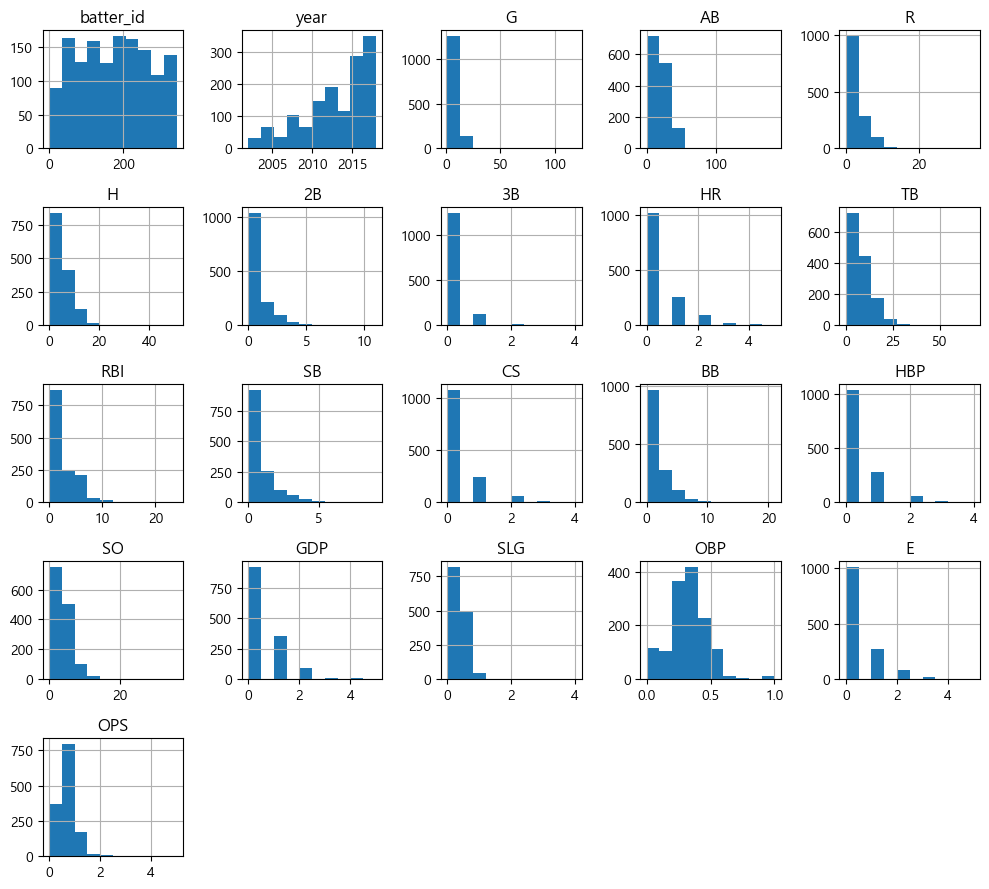

In [5]:
# 프리시즌 데이터 시각화
preseason_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

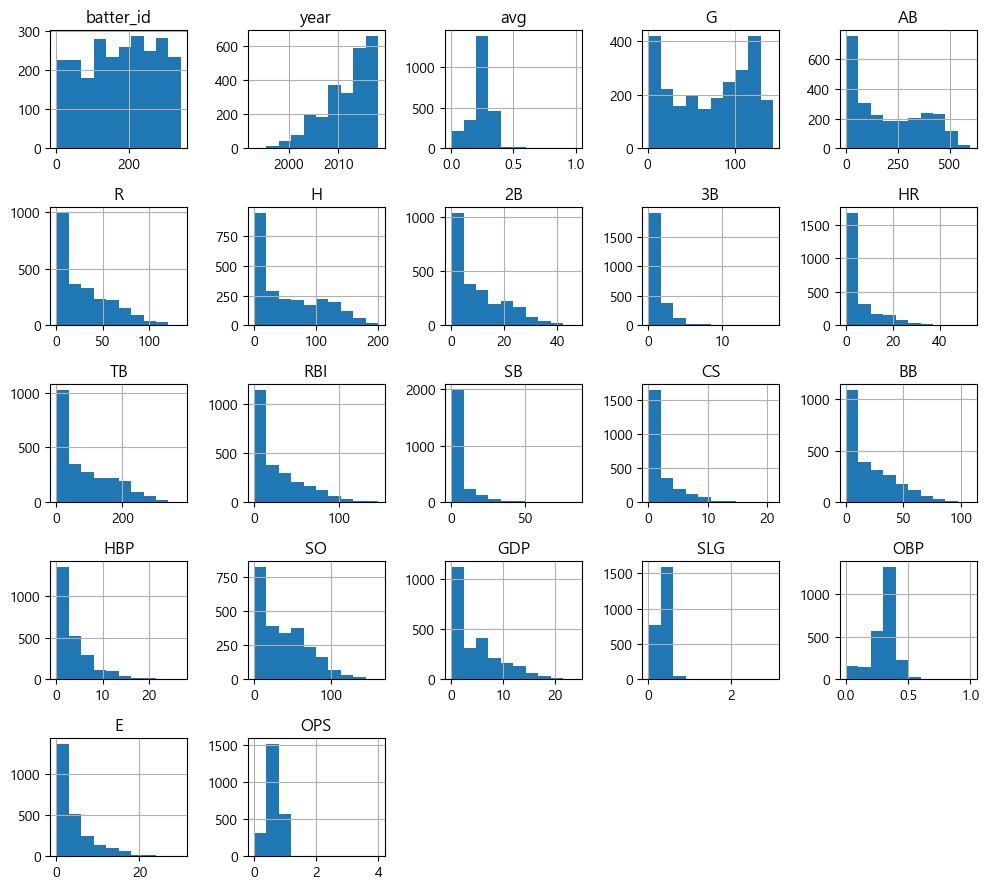

In [6]:
# 정규시즌 데이터 시각화
regular_season_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

In [7]:
regular_season_df.describe()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


In [8]:
# 정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
# 프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')
pd.concat([regular_count,preseason_count, np.round(preseason_count/regular_count,2).rename(
        'ratio')], axis = 1).transpose().loc[:,2002:] # 2002년부터 봅니다.

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [9]:
# 정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
# 프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')
pd.concat([regular_count,preseason_count, np.round(preseason_count/regular_count,2).rename(
        'ratio')], axis = 1).loc[2002:,:] # transpose() 없으면 행단위로 볼수 있음

,regular,preseason,ratio
year,,,
2002,43,12.0,0.28
2003,54,19.0,0.35
2004,68,28.0,0.41
2005,73,37.0,0.51
2006,85,36.0,0.42
2007,98,43.0,0.44
2008,115,61.0,0.53
2009,124,66.0,0.53
2010,130,72.0,0.55


## numpy로 작업하여 pandas와 속도 비교

In [10]:
import time
start = time.time()

yearList = np.unique(regular_season_df['year'])
yearListNum = []


for i in yearList:
    cnt = 0    
    for j in regular_season_df['year']:
        if i == j:
            cnt += 1
    yearListNum.append([i,cnt])
print(yearListNum)

print(time.time()-start)

[[1993, 1], [1994, 2], [1995, 1], [1996, 7], [1997, 8], [1998, 10], [1999, 14], [2000, 20], [2001, 32], [2002, 43], [2003, 54], [2004, 68], [2005, 73], [2006, 85], [2007, 98], [2008, 115], [2009, 124], [2010, 130], [2011, 151], [2012, 174], [2013, 194], [2014, 186], [2015, 207], [2016, 213], [2017, 217], [2018, 227]]
0.018352031707763672


In [11]:
start = time.time()
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
regular_count
print(time.time()-start)

0.0009920597076416016


## 정규시즌 프리시즌 공통 선수 분류

In [12]:
# 타자의 이름과 연도를 이용해 새로운 인덱스를 생성 단 동명이인이 없다는 조건하에 진행, 동명이인이 있다면 battid로 구분
regular_season_df['new_idx'] = regular_season_df['batter_name'] + \
                               regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)
regular_season_df['new_idx']

0       가르시아2018
1        강경학2011
2        강경학2014
3        강경학2015
4        강경학2016
          ...   
2449     황진수2014
2450     황진수2015
2451     황진수2016
2452     황진수2017
2453     황진수2018
Name: new_idx, Length: 2454, dtype: object

In [13]:
# 새로운 인덱스의 교집합(set)
intersection_idx = list(set(regular_season_df['new_idx']).\
                    intersection(preseason_df['new_idx']))
intersection_idx

['심우준2017',
 '김태균2008',
 '윤석민2012',
 '이동훈2016',
 '박한이2013',
 '윤석민2005',
 '고종욱2016',
 '허도환2016',
 '정범모2018',
 '최영진2014',
 '문규현2011',
 '이범호2003',
 '김지수2015',
 '박경수2006',
 '이종욱2014',
 '박한이2008',
 '나종덕2018',
 '김동욱2016',
 '민병헌2017',
 '이재율2018',
 '정성훈2009',
 '김강민2004',
 '이대수2017',
 '박용택2016',
 '김강민2010',
 '김사훈2013',
 '유강남2015',
 '김동한2016',
 '김강민2016',
 '장영석2011',
 '나종덕2017',
 '오재일2016',
 '허경민2012',
 '오재일2012',
 '정의윤2011',
 '김헌곤2012',
 '김민수2014',
 '김동욱2015',
 '박병호2015',
 '김용의2012',
 '김용의2008',
 '박병호2012',
 '나주환2008',
 '송광민2006',
 '김강민2012',
 '정근우2007',
 '러프2017',
 '손시헌2017',
 '정상호2002',
 '이해창2016',
 '김강민2015',
 '김재환2008',
 '장민석2013',
 '나지완2014',
 '최재훈2016',
 '김민성2009',
 '김동한2013',
 '양의지2015',
 '이재원2010',
 '정의윤2015',
 '박기혁2017',
 '김태균2016',
 '이종욱2018',
 '나경민2017',
 '윤석민2015',
 '박준태2015',
 '박정권2012',
 '손주인2016',
 '오재일2011',
 '최항2018',
 '김태완2007',
 '김태균2013',
 '백민기2018',
 '박병호2006',
 '강경학2016',
 '박동원2013',
 '최진행2011',
 '정근우2011',
 '박세혁2012',
 '박광열2017',
 '김강민2003',
 '이진영2014',
 '최진행2015',
 '최형우2

In [14]:
# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[
    regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by = 'new_idx').reset_index(drop=True) 


In [15]:
# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(
    lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by = 'new_idx').reset_index(drop=True)

In [16]:
# 검정 코드
print(regular_season_new.shape, preseason_new.shape)
sum(regular_season_new['new_idx'] == preseason_new['new_idx'])

(1358, 30) (1358, 30)


1358

In [17]:
# 정규시즌과 프리시즌 같은 값 비교 방법 2
# 정규, 프리의 타자이름 + 년도를 합쳐서 새로운 필드 제작
# 정규시즌에 있는 타자이름+년도와 같은 자료를 프리시즌에서 가져옴
# 후 널값이 없는 자료만 가져옴 

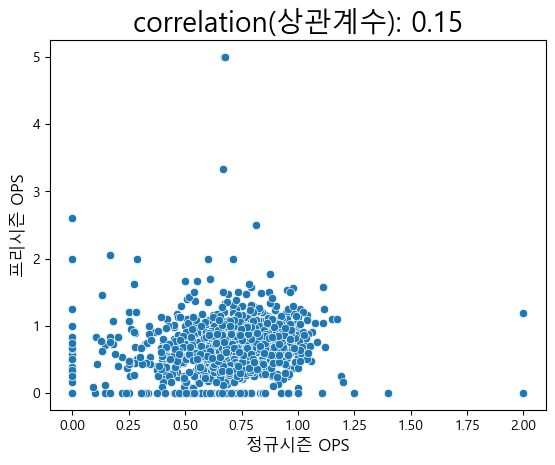

In [18]:
# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("정규시즌 OPS",fontsize=12)
plt.ylabel("프리시즌 OPS",fontsize=12)
plt.show()

프리시즌의 데이터와 정규시즌의 데이터간의 연관성이 없어 정규시즌의 데이터로 작업

## 1.2.2. 정규시즌 데이터 분석

In [19]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [20]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [21]:
regular_season_df = pd.read_csv("data/62540_KBO_prediction_data/Regular_Season_Batter.csv")
display(regular_season_df.shape, regular_season_df.head(),regular_season_df.describe())

(2454, 29)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


선수들간의 편차가 있는걸 인지하고 분석해서 이상치를 제거하지 않음

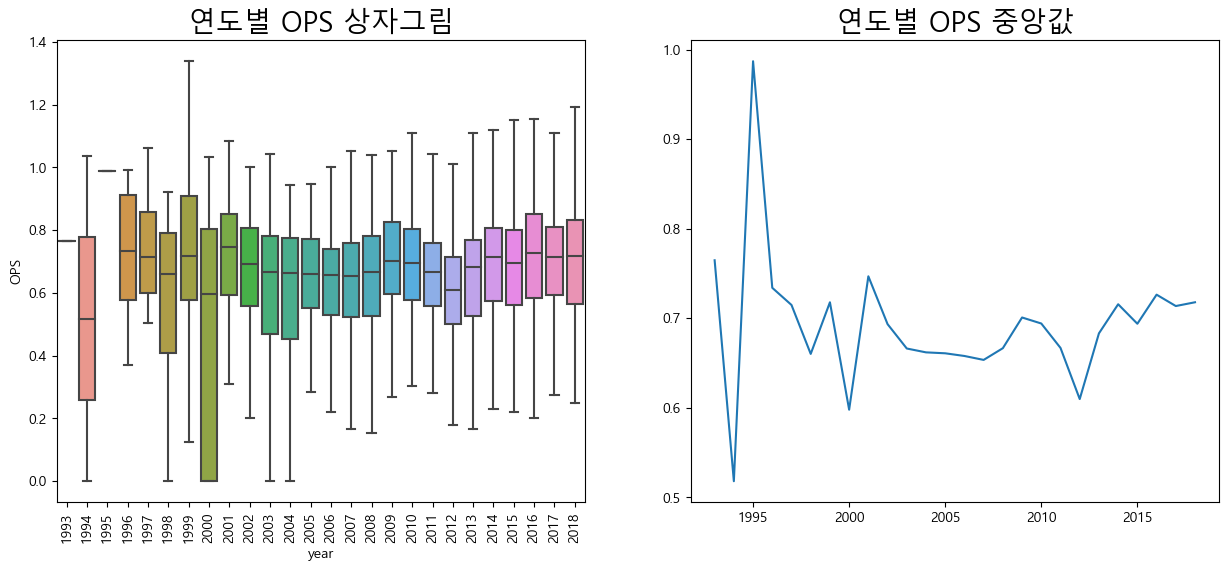

In [22]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="year", y="OPS", data=regular_season_df, showfliers=False)
g.set_title('연도별 OPS 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size = 20)
plt.show()

In [23]:
# regular_season_df.groupby('year')['batter_id'].count() /다양한 명령어로 같은 값을 도출할 수 있음
pd.crosstab(regular_season_df['year'],'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


In [24]:
# 특정 년도의 ops 값을 보며 이상치 확인
tmp = regular_season_df[regular_season_df['year'] == 1998]
tmp[['batter_name', 'OPS']]

,batter_name,OPS
20,진갑용,0.662847
158,박재홍,0.920138
272,김동주,0.792486
890,박진만,0.547971
1081,송지만,0.788829
1101,신경현,0.125000
1824,장성호,0.844605
1963,정수성,0.000000
2085,조인성,0.657806
2199,최동수,0.361879


In [25]:
regular_season_df[regular_season_df['batter_name'] == '정수성'].describe()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.00000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,272.0,2005.571429,0.212143,51.571429,76.500000,15.142857,18.428571,2.428571,0.714286,0.50000,...,9.071429,2.857143,5.214286,2.571429,16.928571,1.000000,0.258298,0.266970,0.785714,0.525268
std,0.0,4.535574,0.090114,35.943790,103.158392,15.917369,27.300928,4.164212,1.540658,0.94054,...,9.067815,2.957575,8.789667,5.287348,21.535174,2.385856,0.119985,0.101706,1.423893,0.211372
min,272.0,1998.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.0,2002.250000,0.169750,23.750000,15.250000,3.000000,3.250000,0.000000,0.000000,0.00000,...,2.000000,0.250000,1.000000,0.000000,4.250000,0.000000,0.180195,0.254167,0.000000,0.440385
50%,272.0,2005.500000,0.234000,43.500000,26.500000,7.500000,4.500000,0.000000,0.000000,0.00000,...,6.500000,2.000000,1.000000,0.500000,6.500000,0.000000,0.267857,0.281886,0.000000,0.553058
75%,272.0,2008.750000,0.255750,84.250000,114.500000,24.500000,28.250000,4.000000,0.000000,0.75000,...,15.250000,5.750000,5.250000,2.750000,27.750000,1.000000,0.336832,0.309956,1.000000,0.643896
max,272.0,2013.000000,0.375000,118.000000,366.000000,53.000000,100.000000,14.000000,5.000000,3.00000,...,29.000000,9.000000,29.000000,20.000000,76.000000,9.000000,0.466667,0.444444,5.000000,0.819444


In [26]:
regular_season_df[regular_season_df['OPS'] == 0]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
1,1,강경학,2011,한화,0.0,2,1,0,0,0,...,0,0.0,0.0,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.0
7,2,강구성,2013,NC,0.0,2,2,0,0,0,...,0,0.0,0.0,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.0
9,2,강구성,2016,NC,0.0,2,3,0,0,0,...,0,0.0,0.0,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.0
10,2,강구성,2017,NC,0.0,1,1,0,0,0,...,0,0.0,0.0,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.0
14,138,백승룡,2007,한화,0.0,8,4,3,0,0,...,1,0.0,0.0,0,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,319,최형우,2004,삼성,0.0,2,2,0,0,0,...,0,0.0,0.0,0,180cm/106kg,1983년 12월 16일,외야수(우투좌타),진북초-전주동중-전주고-삼성-경찰-삼성,5000만원,0.0
2424,340,황선일,2006,LG,0.0,1,2,0,0,0,...,0,0.0,0.0,0,NaN,1987년 02월 17일,NaN,군산중앙초-군산중-군산상고-LG-상무-LG,NaN,0.0
2449,344,황진수,2014,롯데,0.0,5,5,0,0,0,...,0,0.0,0.0,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.0
2450,344,황진수,2015,롯데,0.0,2,2,0,0,0,...,0,0.0,0.0,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.0


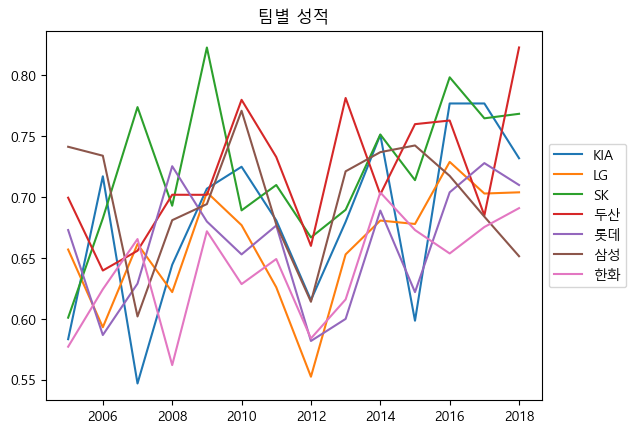

In [27]:
# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index=['team'], columns='year',
                                             values='OPS', aggfunc='median')
# 2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis=1) <= 0

plt.plot(med_OPS_team.loc[team_idx,2005:].T)
plt.legend(med_OPS_team.loc[team_idx,2005:].T.columns, 
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('팀별 성적')
plt.show()

# 팀이 영향을 미치는지 확인, 영향을 미침

In [28]:
import re

regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+',x.split('/')[1])[0]) if pd.notnull(x) else x)

regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+',x.split('/')[0])[0]) if pd.notnull(x) else x)

print(regular_season_df['height/weight'][0], regular_season_df['height'][0],
      regular_season_df['weight'][0])

# 키/몸무계를 int로 변환하기 위해 re.findall('\d+) 숫만 인식, split /으로 분리, null 값이 아닌값만, null이면 pass

177cm/93kg 177.0 93.0


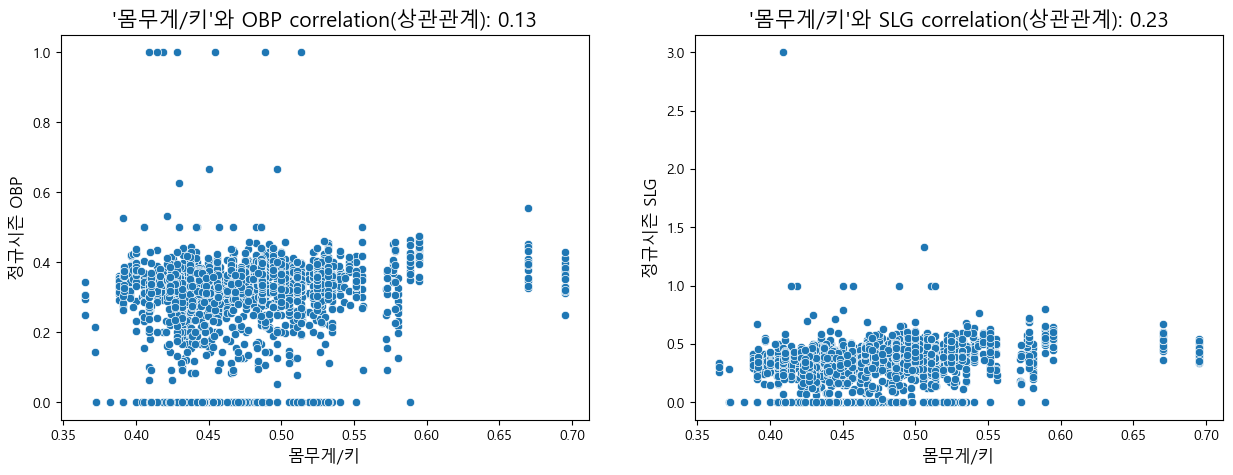

In [29]:
# 몸무게/키 계산
regular_season_df['weight_per_height'] = regular_season_df['weight'] / \
                                         regular_season_df['height']
plt.figure(figsize=(15, 5)) # 그래프 크기 조정
plt.subplot(1, 2, 1) # 1행 2열의 첫번째(1행, 1열) 그래프

# 정규시즌에서 키/몸무계와 OBP(출루율)의 상관관계 계산, 양의 상관관계가 나와야 함
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['OBP'])
plt.title("'몸무게/키'와 OBP correlation(상관관계): " + str(np.round(correlation, 2)), \
          fontsize=15)
plt.ylabel('정규시즌 OBP',fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.subplot(1, 2, 2)

# 정규시즌에서 키/몸무계와 SLG(장타율)의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['SLG'])
plt.title("'몸무게/키'와 SLG correlation(상관관계): " + str(np.round(correlation, 2)), \
          fontsize=15)
plt.ylabel('정규시즌 SLG', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.show()

In [30]:
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [31]:
regular_season_df['position'].apply(lambda x:
    x.split('(')[1][:-1] if pd.notnull(x) else x)

0       우투우타
1       우투좌타
2       우투좌타
3       우투좌타
4       우투좌타
        ... 
2449    우투양타
2450    우투양타
2451    우투양타
2452    우투양타
2453    우투양타
Name: position, Length: 2454, dtype: object

In [32]:
regular_season_df['position'].apply(lambda x:
    x[-5:-1] if pd.notnull(x) else x)

0       우투우타
1       우투좌타
2       우투좌타
3       우투좌타
4       우투좌타
        ... 
2449    우투양타
2450    우투양타
2451    우투양타
2452    우투양타
2453    우투양타
Name: position, Length: 2454, dtype: object

In [33]:
# position
regular_season_df['pos']=regular_season_df['position'].apply(
    lambda x: x.split('(')[0] if pd.notnull(x) else x)

# 우타, 좌타, 양타 구분을 위해 마지막 2글자만 가져옴 [-3:-1]
regular_season_df['hit_way'] = regular_season_df['position'].apply(
    lambda x: x[-3:-1] if pd.notnull(x) else x)
print(regular_season_df['position'][0], regular_season_df['pos'][0], 
      regular_season_df['hit_way'][0])
# 우타 좌타 자료 분리, 수비할때 공 던지는 손 유형, 공격할때 공을 치는 손 유형

내야수(우투우타) 내야수 우타


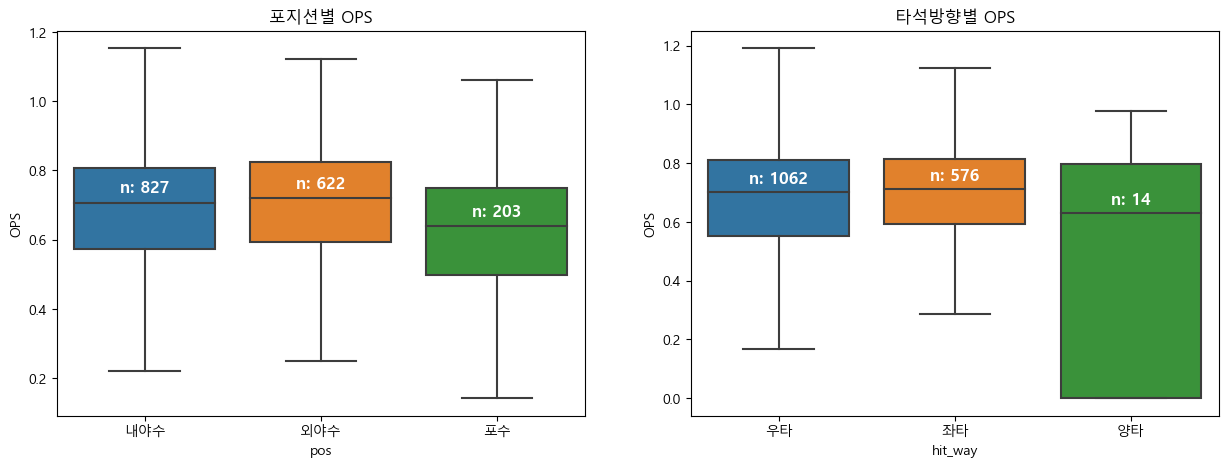

In [34]:
plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x='pos', y='OPS', data = regular_season_df, showfliers=False)

# position 별 OPS 중앙값
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

# position별 관측치 수
nobs = regular_season_df['pos'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), 
            medians[label.get_text()] + 0.03, nobs[label.get_text()],
            horizontalalignment='center', size='large', color='w', weight='semibold')
    
ax.set_title('포지션별 OPS')

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프
ax = sns.boxplot(x='hit_way', y='OPS', data = regular_season_df, showfliers=False)

# 타자 방향별 OPS 중앙값
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()
# 타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
            nobs[label.get_text()], horizontalalignment='center', size='large',
            color='w', weight='semibold')
ax.set_title('타석방향별 OPS')

plt.show()

포지션별 OPS 값은 내야수와 외야수 성적차이 없음, 포수는 다른 포지션 보다 작음
타석방향별 OPS값도 우타 좌타 성적차이 없음, 양타의 경우 OPS가 다소 낮은편이나, 관측값이 14개라 신뢰성에 문제가 있음

In [35]:
# 커리어별 외국인, 내국인 구별해 데이터 탐색

regular_season_df['career'].head()
# 외국인은 띄어쓰기로 국가와 대학, 내국인은 - 기호로 초 중고 분리되어 -를 공백으로 변경하여 데이터 통일

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [36]:
# career를 split, -를 ' ' 공백으로 변환해 외국인과 공통된 형식으로 변경
foreign_country = regular_season_df['career'].apply(
    lambda x: x.replace('-', ' ').split(' ')[0])

# 외국만 추출
foreign_country_list = list(set(foreign_country.apply(
    lambda x: np.nan if '초' in x else x)))

# 결측치 처리, 국적이 표시되지 않은 정보 제외
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['미국', '도미니카', '네덜란드', '쿠바', '캐나다']

In [37]:
# 5개 국가를 외국인으로 설정, country 열 생성 후 국적 추거
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(
    lambda x: x if pd.isnull(x) else ('foreign' if x in foreign_country_list else 'korean'))
                # null값이있다면 그대로 반환하고, 아니라면 x가 foreign_country_list에 있다면 foreign 아니라면 korean
regular_season_df[['country']].head()


,country
0,foreign
1,korean
2,korean
3,korean
4,korean


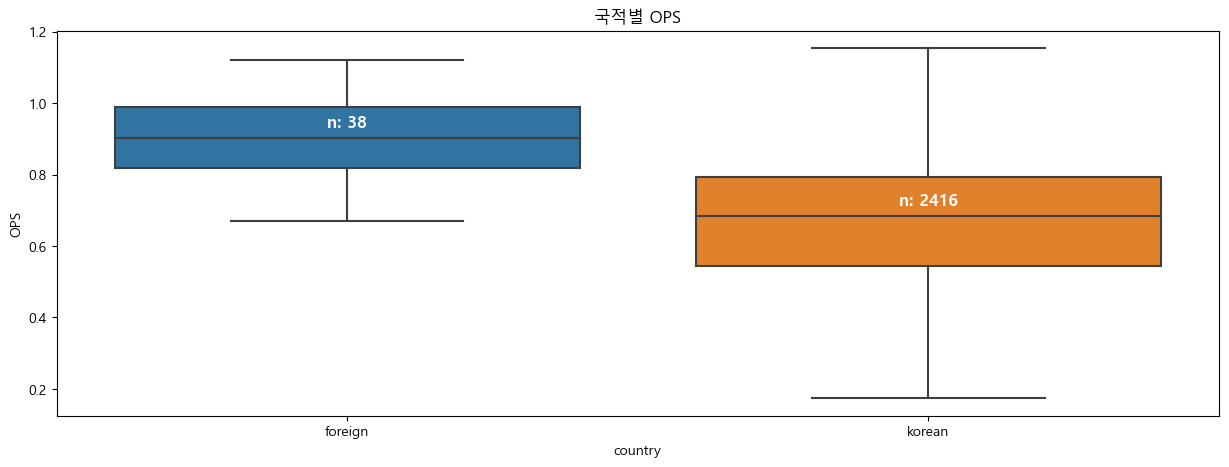

In [38]:
plt.figure(figsize=(15,5)) # 그래프 크기 조정
ax = sns.boxplot(x='country', y='OPS', data = regular_season_df, showfliers=False)

# 내외국인 별 OPS 중앙값 dict
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()
# 내외국인 관측치 수 dict
nobs = regular_season_df['country'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환 
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]
    
for label in ax.get_xticklabels(): # tick은 tick의 위치, label은 그에 해당하는 text 값 
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03, \
            nobs[label.get_text()], # x 좌표, y 좌표, 해당 text
            horizontalalignment='center', size='large', color='w', weight='semibold') 
ax.set_title('국적별 OPS')
plt.show()

비교 결과 외국인 선수의 평균 OPS 가 내국인 보다 성적이 좋음, 단 외국인 숫자가 많지않음

In [39]:
# 초봉테이블 확인
regular_season_df['starting_salary'].value_counts(), regular_season_df['starting_salary'].value_counts().sum()

(10000만원     177
 6000만원      117
 3000만원      105
 9000만원       97
 5000만원       91
 8000만원       89
 30000만원      74
 4000만원       62
 12000만원      62
 18000만원      54
 7000만원       53
 11000만원      49
 13000만원      48
 20000만원      46
 25000만원      45
 15000만원      41
 16000만원      28
 14000만원      26
 28000만원      20
 43000만원      17
 45000만원      16
 27000만원      15
 21000만원      13
 23000만원      12
 33000만원      10
 6500만원       10
 100000달러      4
 300000달러      3
 50000달러       2
 17000만원       1
 Name: starting_salary, dtype: int64,
 1387)

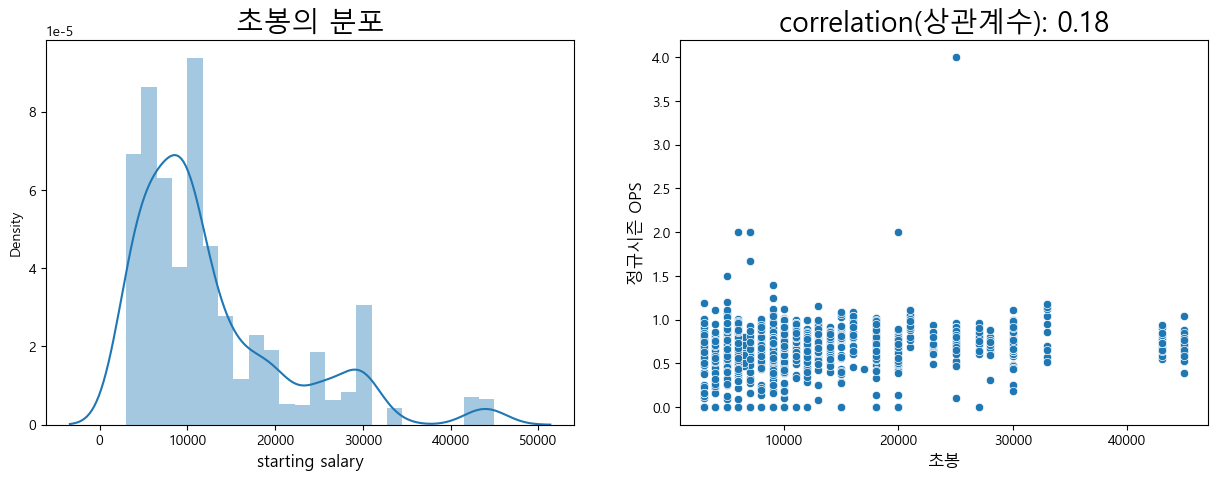

In [40]:
# 국내 선수의 초봉만 비교
# 결측치라면 그대로 0으로 두고 ‘만원’이 포함되어 있다면 숫자만 뽑아서 초봉으로 넣어준다. 그외 만 원 단위가 아닌 초봉은 결측치로 처리한다.
regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(
    lambda x: x if pd.isnull(x)
                 else(int(re.findall('\d+',x)[0]) if '만원' in x else np.nan))

plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
b=sns.distplot(regular_season_df['starting_salary']. \
               loc[regular_season_df['starting_salary'].notnull()], hist=True)
b.set_xlabel("starting salary",fontsize=12)
b.set_title('초봉의 분포', fontsize=20)

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b = sns.scatterplot(regular_season_df['starting_salary'], regular_season_df['OPS'])
b.axes.set_title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
b.set_ylabel("정규시즌 OPS",fontsize=12)
b.set_xlabel("초봉",fontsize=12)
plt.show()

초봉과 OPS 성적과 큰상관성이 없음, 연봉에 따른 성적은 왼쪽으로 치우쳐 있고, 상관계수가 0.18 임

OPS성적과 높은 연관성을 띠는 주어진 데이터에서의 변수가 부족

외국인은 성적이 다소 높으나 매해 명단이 달라지고 숫자가 부족함

주어진 데이터를 그대로 활용하는 것이 아닌 다른차원에서 접근이 필요

## 1.2.3. 일별 데이터 분석

In [41]:
day_by_day_df = pd.read_csv(
    'data/62540_KBO_prediction_data/Regular_Season_Batter_Day_by_Day_b4.csv')
display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [42]:
# 년도는 제대로 표시되어 있으나, 날짜와 일이 .으로 함께 표시 됨

# 날짜(date)를 ‘.’을 기준으로 나누고 첫 번째 값을 월(month)로 지정 
day_by_day_df['month'] = day_by_day_df['date'].apply(lambda x: str(x).split('.')[0])

# 각 연도의 월별 평균 누적 타율(avg2) 계산
agg_df = day_by_day_df.groupby(['year','month'])['avg2'].mean().reset_index()

# pivot_table을 이용해 데이터 변형
agg_df = agg_df.pivot_table(index=['month'], columns='year', values = 'avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


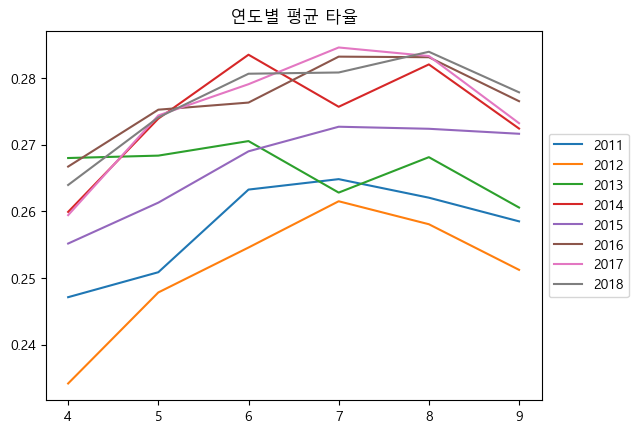

In [43]:
# 월 계산 후 연도별 월별 데이터 현황에 결측치 존재 확인, 3월 10월
# 연도마다 시즌의 시작, 종료시점이 다르다고 추측
# 선수들의 연도와 월별 성적변화 시각화 작업

display(agg_df.iloc[2:, 10:]) # iloc[3월 10월 제외:, 2011년도 부터:끝까지]
plt.plot(agg_df.iloc[2:,10:]) # 2011~2018년 데이터만 이용
plt.legend(agg_df.iloc[2:,10:].columns,
           loc='center left', bbox_to_anchor=(1, 0.5)) # 범례 그래프 밖에 위치
plt.title('연도별 평균 타율')
plt.show()

시즌 시작 이후 대부분 타율이 좋지 않음
5~6월은 안정화 됨
대회가 상반기 성적 예측 대회라면 모델링에 매우 중요한 단서가 될 수 있음

## 1.2.4 탐색적 데이터 분석 요약<br><br>

- 3가지 데이터를 탐색

1. 프리시즌 데이터는 데이터 양이 부족하고 정규시즌 선수의 기록이 없으며, 상관성이 매우 낮아 사용하지 않음
2. 정규시즌데이터에서 OPS가 외국인 여부에 따라 다르게 분포함
3. 일별데이터에서 연도별 월별 선수들의 누적 성적 변화 확인

- 결과: OPS 성적 평균이 월별로 달라지고 7월 이후 성적이 수렴 되는 것 확인하여 이를 바탕으로 데이터 전처리 진행

## 1.3. 데이터 전처리

In [44]:
# 정규시즌의 데이터와 일별데이터, 프리시즌 데이터에 대해 결측치 처리

pd.DataFrame(regular_season_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,...,802,0,1076,26,802,802,802,802,802,0


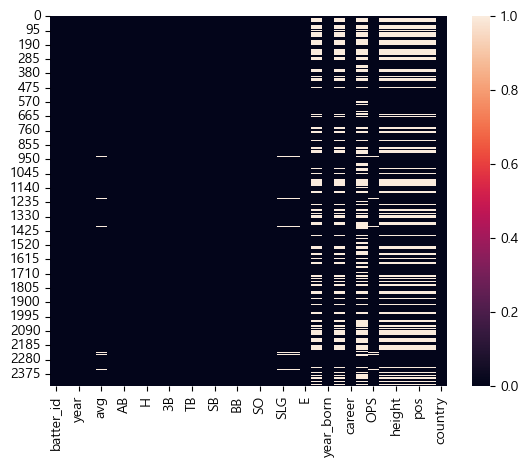

In [45]:
# 결측치 시각화
sns.heatmap(regular_season_df.isna())
plt.show()

In [46]:
# 타율(avg), 장타율(SLG), 출루율(OBP) 등의 변수에 결측치 존재 확인, 타입에 다라 처리방법이 달라 수치형 타입의 변수만 추출해 결측치 처리
# 결측치 존재행 출력

# 수치형 타입의 변수 저장
numerics = [
    'int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # 모든 numeric(수치형) 타입
num_cols = regular_season_df.select_dtypes(include=numerics).columns # 정규시즌의 컬럼중 타입이 수치형인 numerics 변수와 같은 컬럼만 저장, include= 포함할 것 지정

num_cols

Index(['batter_id', 'year', 'avg', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'E',
       'starting_salary', 'OPS', 'weight', 'height', 'weight_per_height'],
      dtype='object')

In [47]:
# 문자형 타입의 변수 저장
tmp = ['object']
regular_season_df.select_dtypes(include=tmp).columns

Index(['batter_name', 'team', 'height/weight', 'year_born', 'position',
       'career', 'pos', 'hit_way', 'country'],
      dtype='object')

In [48]:
# 수치형 타입 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axis=1) -> 열 기준의 결측치 개수
# df.loc[]를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis=1) > 0,num_cols].head()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,...,25,3,0.519000,0.383000,9,NaN,0.902000,93.0,177.0,0.525424
12,138,2005,0.127,39,63,9,8,2,0,0,...,15,1,0.158730,0.256757,3,NaN,0.415487,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,...,14,0,0.194444,0.326087,4,NaN,0.520531,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,...,2,1,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN


변수 G는 선수가 뛴 경기수 이며 뛴 경기가 적어  산출하지 못하는 경우 결측치 발생, 졍규시즌과 일별 데이터 프리데이터 모두 결측치를 0으로 대체


In [49]:
# 수치형 변수에 포함되는 데이터 타입 선정
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# 정규 시즌 데이터에서 결측치를 0으로 채우기
regular_season_df[regular_season_df.select_dtypes(include=numerics).columns] = \
    regular_season_df[regular_season_df.select_dtypes(include=numerics).columns].fillna(0)
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.761,82.0,181.0,0.453039,내야수,양타,korean


In [50]:
# 수치형 변수에 포함되는 데이터 타입 선정
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# 정규 시즌 데이터에서 결측치를 0으로 채우기
regular_season_df[regular_season_df.select_dtypes(include=numerics).columns] = \
    regular_season_df[regular_season_df.select_dtypes(include=numerics).columns].fillna(0)
regular_season_df.isna().sum()

batter_id              0
batter_name            0
year                   0
team                   0
avg                    0
G                      0
AB                     0
R                      0
H                      0
2B                     0
3B                     0
HR                     0
TB                     0
RBI                    0
SB                     0
CS                     0
BB                     0
HBP                    0
SO                     0
GDP                    0
SLG                    0
OBP                    0
E                      0
height/weight        802
year_born              0
position             802
career                 0
starting_salary        0
OPS                    0
weight                 0
height                 0
weight_per_height      0
pos                  802
hit_way              802
country                0
dtype: int64

In [51]:
# 수치형이 아닌 변수 추출
not_num_cols = [x for x in regular_season_df.columns if x not in num_cols]

# 수치형이 아닌 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axis=1) -> 열 기준의 결측치 개수
# df.loc[]를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[not_num_cols].isna().sum(axis=1) > 0,
                      not_num_cols].head()

,batter_name,team,height/weight,year_born,position,career,pos,hit_way,country
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
16,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean


In [52]:
# 삭제할 데이터 추출
drop_idx = regular_season_df.loc[
    # 안타가 0개 이상이면서 장타율이 0인 경우
    ((regular_season_df['H'] > 0) & (regular_season_df['SLG']==0)) |
        
    # 안타가 0개 이상 혹은 볼넷이 0개 이상 혹은 몸에 맞은 볼이 0개 이상이면서 출루율이 0인 경우
    (((regular_season_df['H'] > 0) |
      (regular_season_df['BB'] > 0) |
      (regular_season_df['HBP'] > 0)) &
     (regular_season_df['OBP'] == 0))
].index         

# 데이터 삭제
regular_season_df = regular_season_df.drop(drop_idx).reset_index(drop=True)
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2443,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2444,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2445,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.761,82.0,181.0,0.453039,내야수,양타,korean


## 1.3.2. 규정 타수 정의

타수가 적은 선수는 출루율 장타율이 매우 높거나 낮게 형성될 확률이 높음

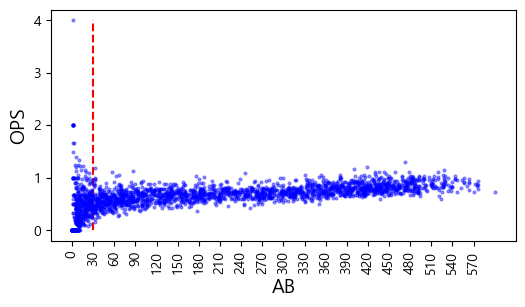

In [53]:
plt.figure(figsize=(6, 3)) # 크기 조정
plt.plot('AB', 'OPS', data=regular_season_df, linestyle='none', marker='o', 
         markersize=2, color='blue', alpha=0.4)
plt.xlabel('AB', fontsize=14)
plt.ylabel('OPS', fontsize=14)
plt.xticks(list(range(min(regular_season_df['AB']), max(regular_season_df['AB']), 30)),
           rotation=90)
plt.vlines(30,ymin=min(regular_season_df['OPS']),ymax=max(regular_season_df['OPS']),
           linestyles='dashed', colors='r')
plt.show()

타수가 30 미만일 경우 분포가 매우 넓음을 확인하여 30을 규정타수로 정의 후 분석진행하며

이상치로 판단되는 OPS를 기록한 경우를 다시한번 탐색 OPS 데이터의 상위 25% 75% 수치와 그 범위를 이용해 이상치 탐색

In [54]:
# OPS 이상치 탐색을 위한 수치 정의
Q1 = regular_season_df['OPS'].quantile(0.25)
Q3 = regular_season_df['OPS'].quantile(0.75)
IQR = Q3 - Q1

# 실제 OPS 이상치 탐색
regular_season_df.loc[(regular_season_df['OPS'] < (Q1 - 1.5 * IQR)) |
                      (regular_season_df['OPS'] > (Q3 + 1.5 * IQR))].sort_values(
    by=['AB'], axis=0, ascending=False)[['batter_name','AB','year','OPS']].head(10)

,batter_name,AB,year,OPS
2329,테임즈,472,2015,1.293656
97,강정호,418,2014,1.200156
1318,유재신,33,2018,1.192000
416,김원섭,25,2005,0.116923
1543,이여상,22,2013,0.090909
681,문규현,18,2007,0.109000
578,김회성,17,2010,0.105000
1902,정병곤,15,2018,0.130000
1874,정경운,15,2018,0.130000
2384,현재윤,15,2014,1.229167


확인 결과 테임즈, 강정호 외에  30이하의 타수에서 이상치 대부분 발생하여 타수를 30으로 정의하는것의 타당성 확인

또한 상반기 성적을 정의하기 위해 며칠까지의 기록을 상반기로 정의할 것인지 결정

야구는 7월 중순쯤 일주일 정도 휴식기를 갖으며 이 휴식 전을 상반기 휴식 이후를 하반기로 정함

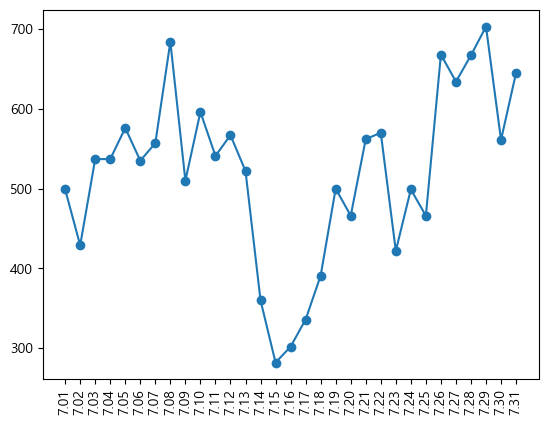

In [55]:
# 7.01~7.31 숫자 생성 후 반 올림
major_ticks = list(np.round(np.linspace(7.01,7.31, 31),2)) 

july = (day_by_day_df['date'] >= 7) & (day_by_day_df['date'] < 8) # 7월만 불러오는 index
plt.plot(major_ticks,
         day_by_day_df['date'].loc[july].value_counts().sort_index(), marker='o')
plt.xticks(major_ticks,rotation=90)
plt.show()

일별 그래프에서 7월 한달동안 경기를 뛴 선수의 합을 그래프화 함

다른날짜는 400경기 이상 경기수가 있으나 14~18일은 경기수가 적어 휴식기라 볼 수 있으므로

7월 18일을 기준으로 상반기 하반기를 나눔

## 1.3.3. 시간 변수

In [56]:
# 시간 변수를 생성하는 함수 정의
def lag_function(df, var_name, past):
    # df = 시간변수를 생성할 데이터 프레임
    # var_name = 시간변수 생성의 대상이 되는 변수 이름
    # past = 몇 년 전의 성적을 생성할지 결정 (정수형)
    df.reset_index(drop=True, inplace = True)
    
    #시간변수 생성
    df['lag'+str(past)+'_'+var_name] = np.nan;
    df['lag'+str(past)+'_'+'AB'] = np.nan
    
    for col in ['AB', var_name]:
        for i in range(0,(max(df.index)+1)):
            val = df.loc[(df['batter_name'] == df['batter_name'][i]) & 
                         (df['year'] == df['year'][i] - past), col]
            # 과거 기록이 결측치가 아니라면 값을 넣기
            if(len(val) != 0):
                df.loc[i, 'lag' + str(past) + '_' + col] = val.iloc[0]

    #30타수 미만 결측치 처리
    df.loc[df['lag' + str(past) + '_' + 'AB'] < 30, 
           'lag' + str(past) + '_' + var_name] = np.nan
    df.drop('lag' + str(past) + '_' + 'AB', axis = 1, inplace = True)

    return df

In [57]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(
    ['batter_id','year','OPS','SLG'], axis =1).columns)
regular_season_temp = regular_season_df[numeric_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB'] >= 30]  # 교재 40페이지 규제 참조

regular_season_temp

,avg,G,AB,R,H,2B,3B,HR,TB,RBI,...,SO,GDP,OBP,E,starting_salary,weight,height,weight_per_height,year,batter_name
0,0.339,50,183,27,62,9,0,8,95,34,...,25,3,0.383000,9,0.0,93.0,177.0,0.525424,2018,가르시아
2,0.221,41,86,11,19,2,3,1,30,7,...,28,1,0.337000,6,10000.0,72.0,180.0,0.400000,2014,강경학
3,0.257,120,311,50,80,7,4,2,101,27,...,58,3,0.348000,15,10000.0,72.0,180.0,0.400000,2015,강경학
4,0.158,46,101,16,16,3,2,1,26,7,...,30,5,0.232000,7,10000.0,72.0,180.0,0.400000,2016,강경학
5,0.214,59,84,17,18,2,1,0,22,4,...,19,1,0.290000,4,10000.0,72.0,180.0,0.400000,2017,강경학
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0.335,127,498,97,167,26,5,27,284,113,...,66,10,0.394000,15,6000.0,96.0,183.0,0.524590,2016,황재균
2437,0.296,142,530,76,157,41,3,25,279,88,...,120,5,0.358000,17,6000.0,96.0,183.0,0.524590,2018,황재균
2438,0.149,18,47,4,7,0,0,1,10,5,...,15,0,0.298246,1,0.0,0.0,0.0,0.000000,2012,황정립
2439,0.244,21,45,8,11,2,0,1,16,8,...,13,2,0.403509,1,0.0,0.0,0.0,0.000000,2013,황정립


In [58]:
print(numeric_cols)

['avg', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'OBP', 'E', 'starting_salary', 'weight', 'height', 'weight_per_height']


In [59]:
# 시간변수 생성 함수를 통한 지표별 1년 전 성적 추출
for col in numeric_cols:
    regular_season_temp = lag_function(regular_season_temp, col, 1)

numeric_cols.remove('OBP')
regular_season_temp.drop(numeric_cols, axis = 1, inplace= True)


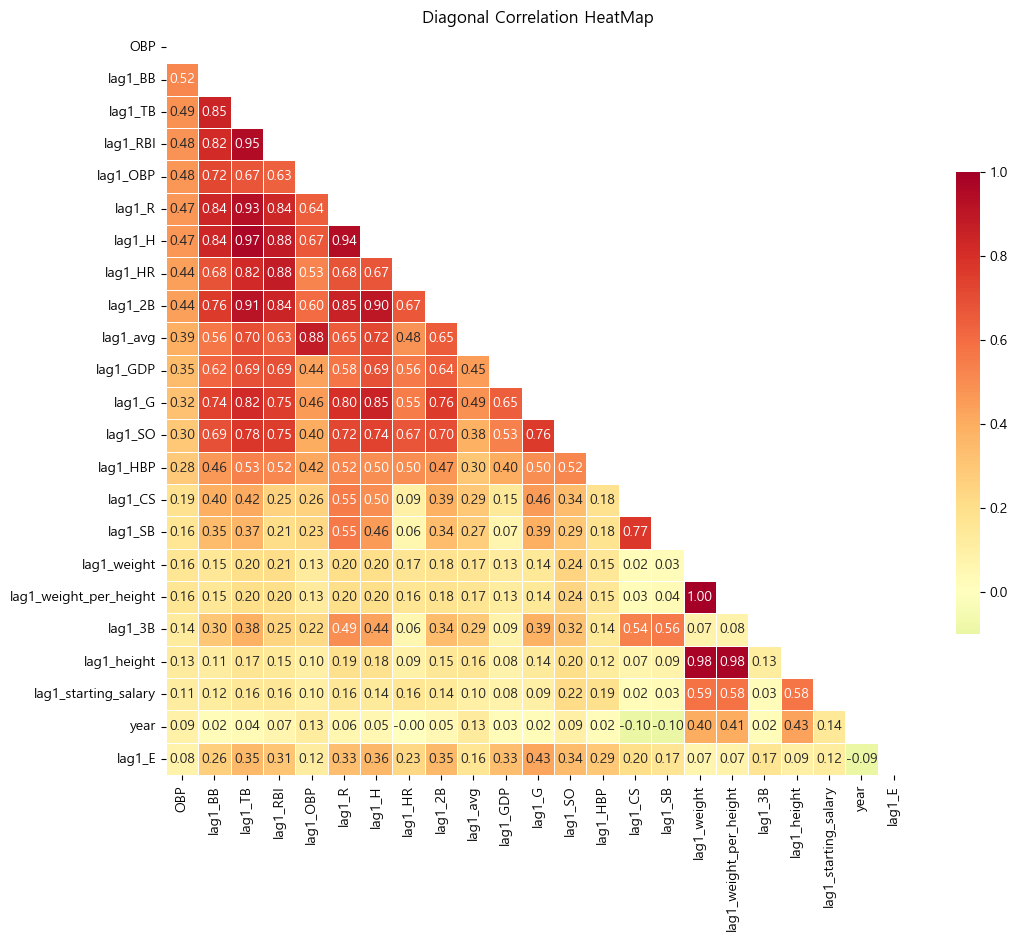

In [60]:
# 상관관계 도출
corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'OBP', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = regular_season_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")
plt.show()

In [61]:
#희생 플라이 구하기
#OBP(출루율) 계산 공식 이용하여 SF(희생 플라이)계산 >> (H+BB+HBP)/OBP-(AB+BB+HBP)
regular_season_df['SF'] = \
    regular_season_df[['H','BB','HBP']].sum(axis=1) / regular_season_df['OBP'] - \
    regular_season_df[['AB','BB','HBP']].sum(axis=1)
regular_season_df['SF'].fillna(0, inplace = True)
regular_season_df['SF'] = regular_season_df['SF'].apply(lambda x : round(x,0))

#한 타수당 평균 희생 플라이 계산 후 필요한 것만 추출
regular_season_df['SF_1'] = regular_season_df['SF'] / regular_season_df['AB']
regular_season_df_SF = regular_season_df[['batter_name','year','SF_1']]
regular_season_df_SF

,batter_name,year,SF_1
0,가르시아,2018,0.032787
1,강경학,2011,0.000000
2,강경학,2014,-0.000000
3,강경학,2015,0.009646
4,강경학,2016,0.009901
...,...,...,...
2442,황진수,2014,0.000000
2443,황진수,2015,0.000000
2444,황진수,2016,0.000000
2445,황진수,2017,0.008547


In [62]:
#day_by_day에서 연도별 선수의 시즌 전반기 출루율과 관련된 성적 합 구하기
sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(
    ['batter_name','year'])['AB','H','BB','HBP'].sum().reset_index()

#day_by_day와 regular season에서 구한 희생 플라이 관련 데이터를 합치기
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df_SF, how = 'left',
                                    on=['batter_name','year'])

#선수별 전반기 희생 플라이 수 계산
sum_hf_yr_OBP['SF'] = (sum_hf_yr_OBP['SF_1']*sum_hf_yr_OBP['AB']).apply(
    lambda x: round(x, 0))
sum_hf_yr_OBP.drop('SF_1', axis = 1, inplace = True)

#선수별 전반기 OBP(출루율) 계산
sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H', 'BB', 'HBP']].sum(axis = 1) / \
                       sum_hf_yr_OBP[['AB', 'BB', 'HBP','SF']].sum(axis = 1)
# OBP 결측치를 0으로 처리 
sum_hf_yr_OBP['OBP'].fillna(0, inplace = True)

# 분석에 필요하지 않은 열 제거
sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name','year','AB','OBP']]
sum_hf_yr_OBP

,batter_name,year,AB,OBP
0,가르시아,2018,85,0.418367
1,강경학,2011,1,0.000000
2,강경학,2014,0,1.000000
3,강경학,2015,156,0.342541
4,강경학,2016,81,0.222222
...,...,...,...,...
1381,황진수,2012,4,0.400000
1382,황진수,2013,0,0.000000
1383,황진수,2016,9,0.000000
1384,황진수,2017,71,0.316456


## 1.3.4. 추가 변수 생성

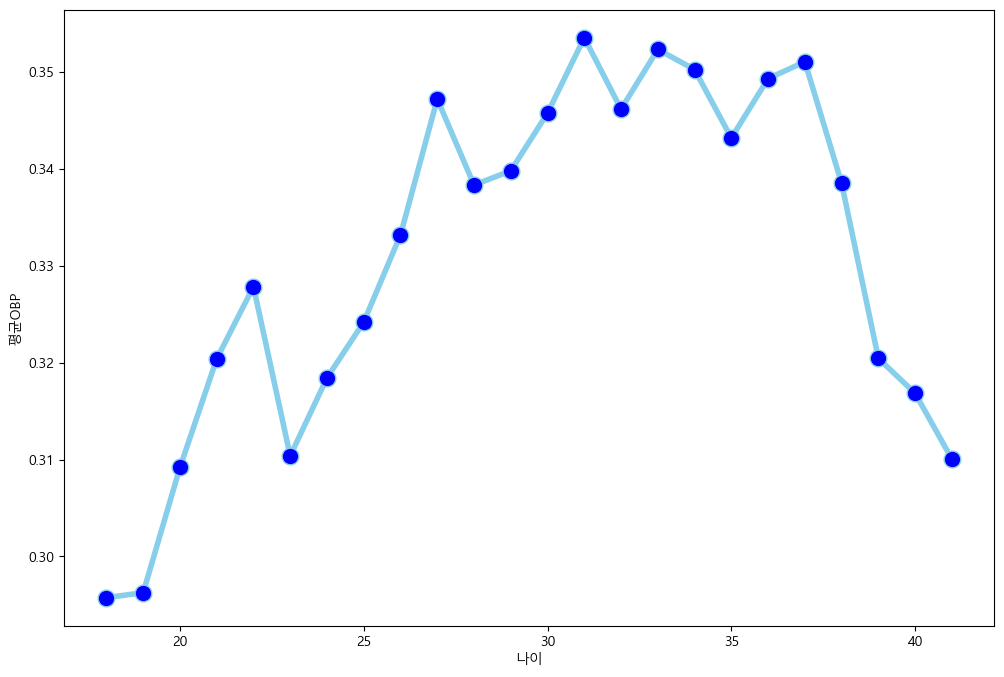

In [63]:
# 나이 변수 생성
regular_season_df['age'] = regular_season_df['year'] - \
                           regular_season_df['year_born'].apply(lambda x: int(x[:4]))

# 나이, 평균 출루율, 출루율 중위값으로 구성된 데이터프레임 구축
temp_df = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('age').agg(
    {'OBP':['mean','median']}).reset_index()
temp_df.columns = temp_df.columns.droplevel()
temp_df.columns = ['age', 'mean_OBP', 'median_OBP']

# 나이에 따른 출루율 추이 시각화
plt.figure(figsize=(12,8))
plt.plot('age', 'mean_OBP', data=temp_df, marker='o', markerfacecolor='blue',
         markersize=12, color='skyblue', linewidth=4)
plt.ylabel('평균OBP')
plt.xlabel('나이')
plt.show()

In [64]:
# 나이를 포함한 변수 선택
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df[['batter_name','year','age']],
                                    how = 'left', on=['batter_name','year'])

# 총 3년 전 성적까지 변수를 생성
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 2)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 3)
sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN
...,...,...,...,...,...,...,...,...
1381,황진수,2012,4,0.400000,23,NaN,NaN,NaN
1382,황진수,2013,0,0.000000,24,NaN,NaN,NaN
1383,황진수,2016,9,0.000000,27,NaN,NaN,NaN
1384,황진수,2017,71,0.316456,28,NaN,NaN,NaN


## 1.3.5. 데이터 사후 처리

In [65]:
round(sum_hf_yr_OBP[['lag1_OBP','lag2_OBP','lag3_OBP']].isna().sum() / \
      sum_hf_yr_OBP.shape[0], 2)

lag1_OBP    0.41
lag2_OBP    0.54
lag3_OBP    0.61
dtype: float64

In [66]:
#1. 선수별 OBP 평균
# SF = (H+BB+HBP) / OBP-(AB+BB+HBP)
# OBP = (H+BB+HBP) / (AB+BB+HBP+SF)
player_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'batter_name')['AB','H','BB','HBP','SF'].sum().reset_index()
player_OBP_mean['mean_OBP'] = player_OBP_mean[['H', 'BB', 'HBP']].sum(axis=1) / \
                            player_OBP_mean[['AB','BB','HBP','SF']].sum(axis=1)

#2. 시즌별 OBP 평균
season_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'year')['AB','H','BB','HBP','SF'].sum().reset_index()
season_OBP_mean['mean_OBP'] = season_OBP_mean[['H', 'BB', 'HBP']].sum(axis=1) / \
                              season_OBP_mean[['AB','BB','HBP','SF']].sum(axis=1)
season_OBP_mean = season_OBP_mean[['year', 'mean_OBP']]

#### player_OBP_mean(선수평균) 열 추가
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(player_OBP_mean[['batter_name', 'mean_OBP']],
                                    how ='left', on="batter_name")
sum_hf_yr_OBP = \
    sum_hf_yr_OBP.loc[~sum_hf_yr_OBP['mean_OBP'].isna()].reset_index(drop=True)
sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN,0.383495
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN,0.337880
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN,0.337880
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN,0.337880
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23,NaN,NaN,NaN,0.358779
1348,황진수,2013,0,0.000000,24,NaN,NaN,NaN,0.358779
1349,황진수,2016,9,0.000000,27,NaN,NaN,NaN,0.358779
1350,황진수,2017,71,0.316456,28,NaN,NaN,NaN,0.358779


In [67]:
# 결측치 처리하는 함수 정의
def lag_na_fill(data_set, var_name, past, season_var_mean_data):
    # data_Set: 이용할 데이터셋
    # var_name: 시간 변수를 만들 변수 이름
    # past: 몇 년 전 변수를 만들지 결정
    # season_var_name_mean_data season별로 var_name의 평균을 구한 데이터
  
    for i in range(0,len(data_set)):
        if np.isnan(data_set["lag"+str(past)+"_"+var_name][i]):
            data_set.loc[i,["lag"+str(past)+"_"+var_name]] = (
                data_set["mean" + "_" + var_name][i] + season_var_mean_data.loc[
                    season_var_mean_data['year'] == (data_set['year'][i] - past),
                    "mean_" + var_name].iloc[0]
                ) / 2
    return data_set

In [68]:
# 생성한 함수를 이용해 결측치 처리 진행
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 1, season_OBP_mean) # 1년 전 성적 대체
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 2, season_OBP_mean) # 2년 전 성적 대체
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 3, season_OBP_mean) # 3년 전 성적 대체
sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,0.369982,0.375910,0.373119,0.383495
1,강경학,2011,1,0.000000,19,0.347434,0.348603,0.344259,0.337880
2,강경학,2014,0,1.000000,22,0.346682,0.337511,0.343131,0.337880
3,강경학,2015,156,0.342541,23,0.353425,0.346682,0.337511,0.337880
4,강경학,2016,81,0.222222,24,0.342541,0.353425,0.346682,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23,0.353580,0.357883,0.359052,0.358779
1348,황진수,2013,0,0.000000,24,0.347960,0.353580,0.357883,0.358779
1349,황진수,2016,9,0.000000,27,0.360760,0.363874,0.357131,0.358779
1350,황진수,2017,71,0.316456,28,0.363552,0.360760,0.363874,0.358779


## 1.3.6. SLG 데이터 전처리

In [69]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(
    ['batter_id','year','OPS','OBP'], axis =1).columns)
regular_season_temp = regular_season_df[numeric_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB']>=30]

# 시간변수 생성 함수를 통한 지표별 1년 전 성적 추출
for col in numeric_cols:
    regular_season_temp = lag_function(regular_season_temp, col, 1)

numeric_cols.remove('SLG')
regular_season_temp.drop(numeric_cols, axis = 1, inplace=True)

# 상관관계 도출
corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'SLG', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

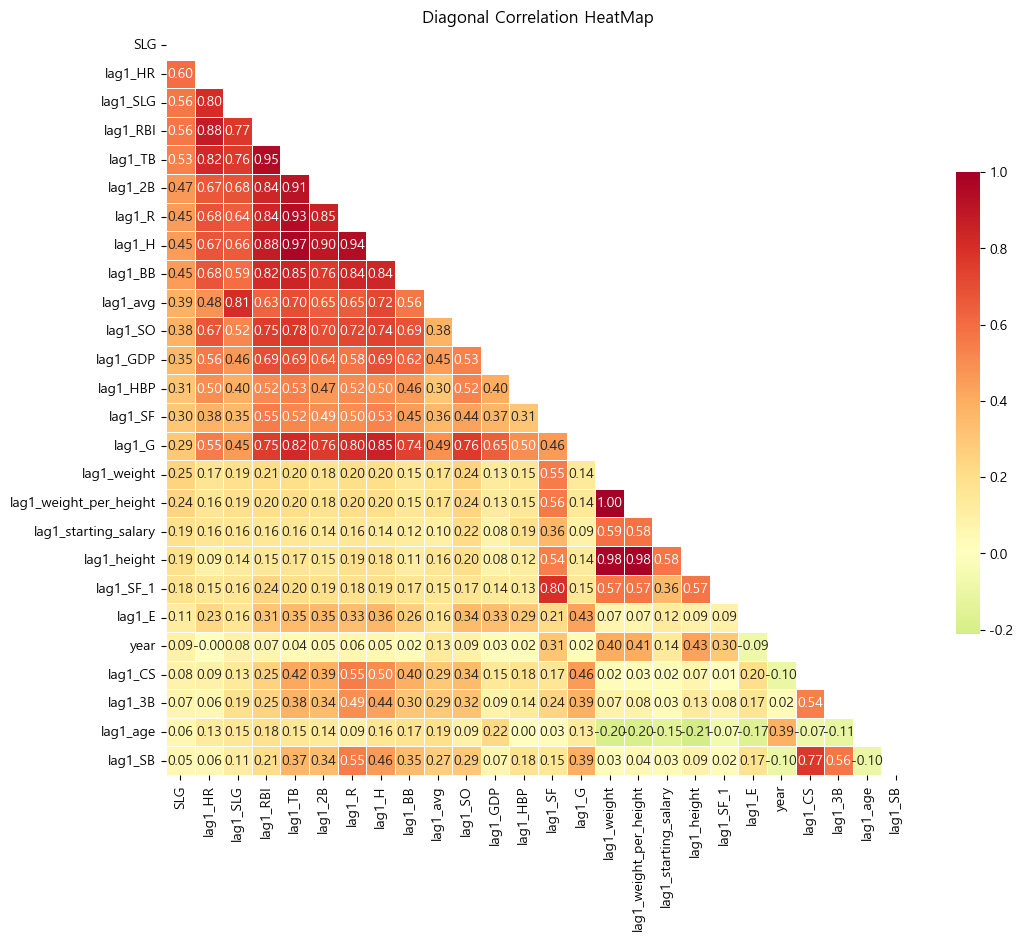

In [70]:
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = regular_season_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax=1, mask=mask, center=0, annot=True,
                fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")
plt.show()

In [71]:
# day_by_day에서 연도별 선수의 시즌 전반기 장타율(SLG)과 관련된 성적 합 구하기
sum_hf_yr_SLG = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(
    ['batter_name','year'])['AB','H','2B','3B', 'HR'].sum().reset_index()

# 전반기 장타율 계산
sum_hf_yr_SLG['SLG'] = \
    (sum_hf_yr_SLG['H'] - sum_hf_yr_SLG[['2B', '3B', 'HR']].sum(axis=1) +
     sum_hf_yr_SLG['2B']*2 + sum_hf_yr_SLG['3B']*3 + sum_hf_yr_SLG['HR']*4
     ) / sum_hf_yr_SLG['AB']

# SLG 결측치를 0으로 처리 
sum_hf_yr_SLG['SLG'].fillna(0, inplace=True)

# 필요한 칼럼만 불러오고 나이 계산
sum_hf_yr_SLG = sum_hf_yr_SLG[['batter_name','year','AB','SLG']]
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(regular_season_df[['batter_name','year','age']],
                                    how='left', on=['batter_name','year'])
sum_hf_yr_SLG.head()

,batter_name,year,AB,SLG,age
0,가르시아,2018,85,0.552941,33
1,강경학,2011,1,0.000000,19
2,강경학,2014,0,0.000000,22
3,강경학,2015,156,0.333333,23
4,강경학,2016,81,0.222222,24


In [72]:

# 총 3년 전 성적까지 변수를 생성
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 1)
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 2)
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 3)
display(sum_hf_yr_SLG.head())

round(sum_hf_yr_SLG[['lag1_SLG', 'lag2_SLG', 'lag3_SLG']].isna().sum()/\
      sum_hf_yr_SLG.shape[0], 2)

,batter_name,year,AB,SLG,age,lag1_SLG,lag2_SLG,lag3_SLG
0,가르시아,2018,85,0.552941,33,NaN,NaN,NaN
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN
2,강경학,2014,0,0.000000,22,NaN,NaN,NaN
3,강경학,2015,156,0.333333,23,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24,0.333333,NaN,NaN


lag1_SLG    0.41
lag2_SLG    0.54
lag3_SLG    0.61
dtype: float64

In [73]:
# 선수별 SLG 평균 데이터(player_SLG_mean)를 만듭니다
player_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'batter_name')['AB','H','2B','3B','HR'].sum().reset_index()
player_SLG_mean['mean_SLG'] = \
    (player_SLG_mean['H'] - player_SLG_mean[['2B','3B','HR']].sum(axis = 1) +
     player_SLG_mean['2B']*2 + player_SLG_mean['3B']*3 + player_SLG_mean['HR']*4
    ) / player_SLG_mean['AB']

# 시즌별 SLG 평균 데이터(season_SLG_mean)를 만듭니다
season_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'year')['AB','H','2B','3B','HR'].sum().reset_index()
season_SLG_mean['mean_SLG'] = \
    (season_SLG_mean['H'] - season_SLG_mean[['2B','3B','HR']].sum(axis = 1) + 
     season_SLG_mean['2B']*2 + season_SLG_mean['3B']*3 + season_SLG_mean['HR']*4
    ) / season_SLG_mean['AB']

# 선수 평균의 SLG(player_OBP_mean)를 새로운 변수로 더합니다.
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(player_SLG_mean[['batter_name', 'mean_SLG']],
                                    how='left', on="batter_name")

# 선수 평균의 성적이 결측치이면 데이터에서 제거합니다.
sum_hf_yr_SLG = \
    sum_hf_yr_SLG.loc[~sum_hf_yr_SLG['mean_SLG'].isna()].reset_index(drop=True)

# 결측치 처리
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 1, season_SLG_mean) #1년전 성적 대체
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 2, season_SLG_mean) #2년전 성적 대체
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 3, season_SLG_mean) #3년전 성적 대체

display(sum_hf_yr_SLG.head())
round(sum_hf_yr_SLG[['lag1_SLG', 'lag2_SLG', 'lag3_SLG']].isna().sum()/\
      sum_hf_yr_SLG.shape[0], 2)

,batter_name,year,AB,SLG,age,lag1_SLG,lag2_SLG,lag3_SLG,mean_SLG
0,가르시아,2018,85,0.552941,33,0.481855,0.481498,0.476627,0.519126
1,강경학,2011,1,0.000000,19,0.372902,0.380882,0.361716,0.332527
2,강경학,2014,0,0.000000,22,0.362931,0.349344,0.359616,0.332527
3,강경학,2015,156,0.333333,23,0.389415,0.362931,0.349344,0.332527
4,강경학,2016,81,0.222222,24,0.333333,0.389415,0.362931,0.332527


lag1_SLG    0.0
lag2_SLG    0.0
lag3_SLG    0.0
dtype: float64

## p58

## 1.4. 모델링
### 1.4.1. 데이터 분할

In [74]:
# 30타수 이상의 데이터만 학습
sum_hf_yr_OBP= sum_hf_yr_OBP.loc[sum_hf_yr_OBP['AB']>=30]
sum_hf_yr_SLG = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['AB']>=30] 

# 2018년 데이터를 test 데이터 2018년 이전은 train 데이터로 나눈다.
OBP_train = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] != 2018]
OBP_test = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] == 2018]

SLG_train = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] != 2018]
SLG_test = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] == 2018]
print(OBP_train.shape, OBP_test.shape, SLG_train.shape, SLG_test.shape)

(872, 9) (150, 9) (872, 9) (150, 9)


In [75]:
def wrmse(v,w,p):
    # v: 실제값
    # w: 타수
    # p: 예측값
    return sum(np.sqrt(((v-p)**2 * w) / sum(w)))

## 1.4.2. 모델 선택

In [76]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다. 
lasso_params = {'alpha':np.logspace(-4, 1, 6)} 
ridge_params = {'alpha':np.logspace(-4, 1, 6)} 

# GridSearchCV를 이용하여 dict에 Lasso, Ridege OBP 모델을 저장한다.
OBP_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_,}

# GridSearchCV를 이용하여 dict에 Lasso, Ridge SLG 모델을 저장한다
SLG_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(),param_grid=ridge_params).fit(
        SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_,}